# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [143]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [144]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [6]:
df_data = pd.read_csv('data/mission_launches.csv')

# Preliminary Data Exploration


In [328]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [327]:

for column in df_data.columns:
     is_nul = df_data[column].isnull().sum()
     boolean = df_data[column].duplicated().any()
     print(f"{column} has {is_nul} NaN Values and Has Duplicates is {boolean}\n")



Organisation has 0 NaN Values and Has Duplicates is True

Location has 0 NaN Values and Has Duplicates is True

Date has 0 NaN Values and Has Duplicates is True

Detail has 0 NaN Values and Has Duplicates is True

Rocket_Status has 0 NaN Values and Has Duplicates is True

Price has 3360 NaN Values and Has Duplicates is True

Mission_Status has 0 NaN Values and Has Duplicates is True



## Data Cleaning - Check for Missing Values and Duplicates


In [7]:
df_data = df_data.drop(df_data.columns[[0, 1]],axis = 1)
df_data.tail()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [330]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


## Descriptive Statistics

In [152]:
#df_data.describe()
#df_data.count()
#df_data.sum()
#df_data.mode()
#df_data.min()
# df_data.max()
# df_data.abs()


# Number of Launches per Company


In [153]:
Launches = df_data.Organisation.value_counts()

<BarContainer object of 56 artists>

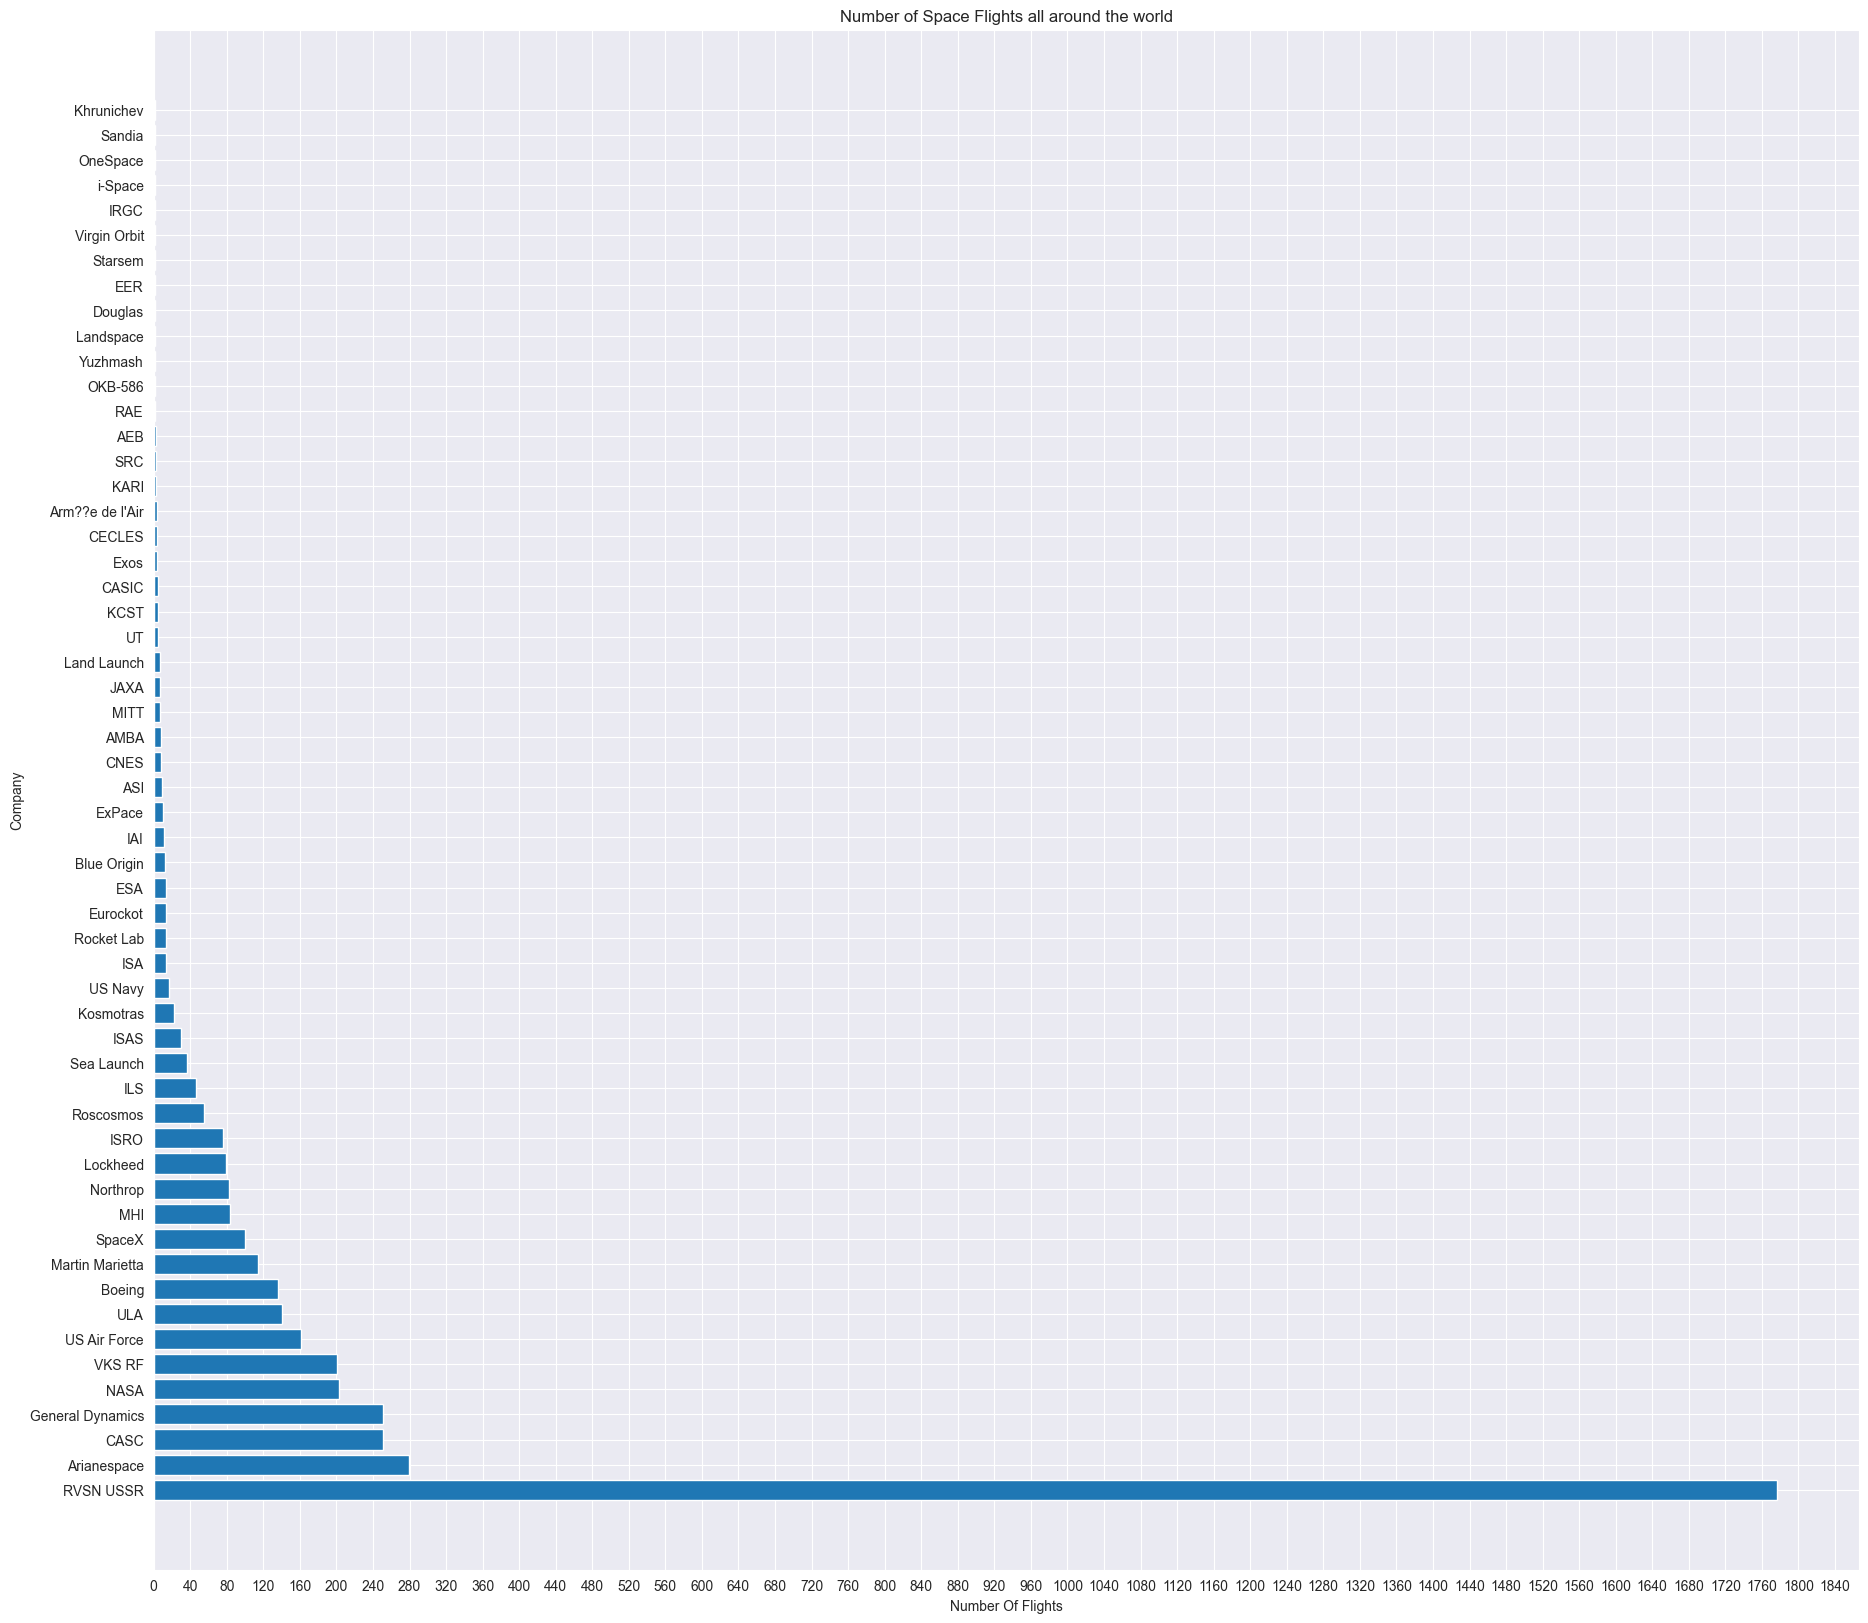

In [154]:
Companys = Launches.index
launch = Launches.values
fig, ax = plt.subplots(figsize=(22,20))
ax.xaxis.set_major_locator(plt.MaxNLocator(60))
plt.xlabel("Number Of Flights")
plt.ylabel("Company")
plt.title("Number of Space Flights all around the world")
ax.barh(Companys, launch, antialiased=True)


# Number of Active versus Retired Rockets


In [155]:
Act_vs_ret = df_data.Rocket_Status.value_counts()

<BarContainer object of 2 artists>

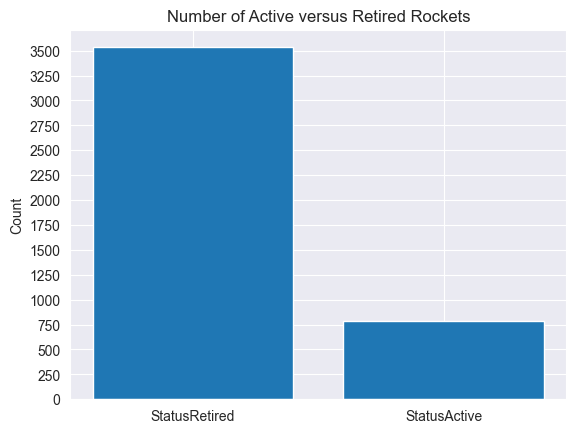

In [156]:
x = Act_vs_ret.index
y = Act_vs_ret.values
figu, ax = plt.subplots()
plt.xlabel("")
ax.yaxis.set_major_locator(plt.MaxNLocator(15))
plt.ylabel("Count")
plt.title("Number of Active versus Retired Rockets")
ax.bar(x, y, antialiased=True)

# Distribution of Mission Status


In [157]:
success_vs_fail = df_data.Mission_Status.value_counts()

In [158]:
success_vs_fail

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

# How Expensive are the Launches? 


In [8]:
df_data.fillna(0)
df_data.Price = df_data.Price.str.replace(",", '')
df_data.Price = df_data.Price.astype(float)

(0.0, 100.0)

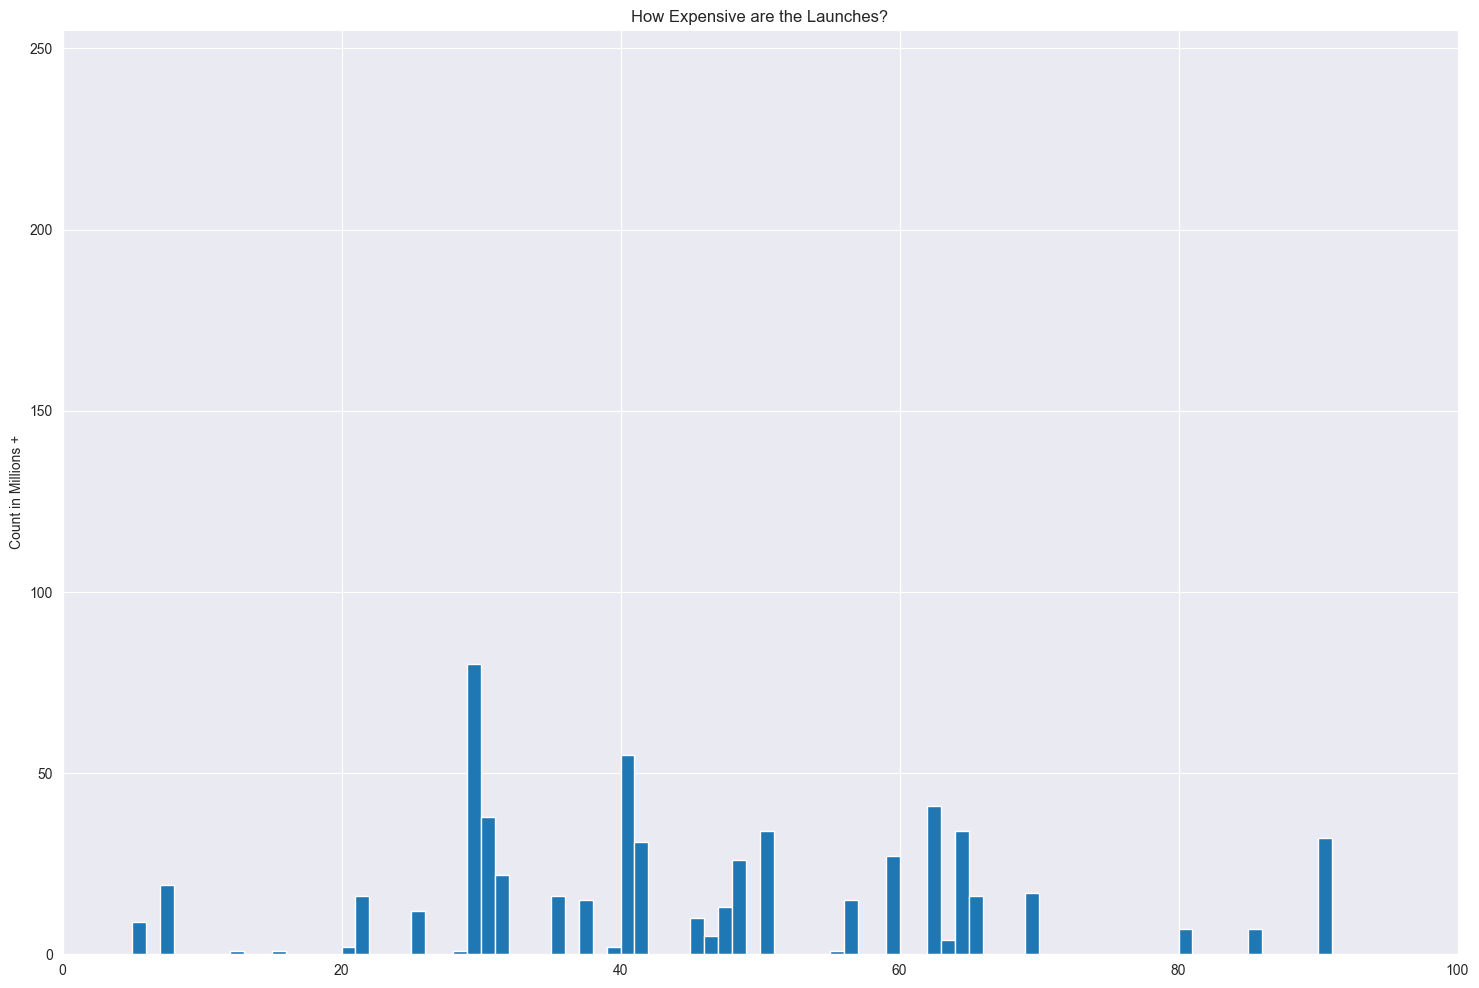

In [160]:
figud, ax = plt.subplots(figsize=(18, 12))
b, bins, patches = plt.hist(df_data.Price, bins=np.arange(255))
plt.ylim([0,255])
plt.ylabel("Count in Millions +")
plt.title("How Expensive are the Launches?")
plt.xlim([0,100])

# Use a Choropleth Map to Show the Number of Launches by Country



In [161]:
launch_country = df_data.Location.str.split(",")
launch_country = launch_country.str[-1]
launch_country = launch_country.str.replace("Russia", "Russian Federation")
launch_country = launch_country.str.replace("New Mexico", "USA")
launch_country = launch_country.str.replace("Yellow Sea", "China")
launch_country = launch_country.str.replace("Shahrud Missile Test Site", "Iran")
launch_country = launch_country.str.replace("Pacific Missile Range Facility", "USA")
launch_country = launch_country.str.replace("Barents Sea", "Russian Federation")
launch_country = launch_country.str.replace("Gran Canaria", "USA")
launch_country


0               USA
1             China
2               USA
3        Kazakhstan
4               USA
           ...     
4319            USA
4320            USA
4321            USA
4322     Kazakhstan
4323     Kazakhstan
Name: Location, Length: 4324, dtype: object

In [162]:
data = launch_country.value_counts()
data = data.to_frame()
data["Country_iso"] = ['RUS', 'USA', 'KAZ', "FRA", "CHN", "JPN", "IND", '', "IRN", "NZL", "ISR", 'KEN', 'AUS', "PRK", "ROK", "BRA"]
data = data.rename(columns={"Location": "Number_of_Launches"})
figh = px.choropleth(data, locations=data.Country_iso,
                    color=data.Number_of_Launches,
                    hover_name=data.index,
                    color_continuous_scale=px.colors.sequential.Plasma)
figh.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [163]:
launch_falu = df_data.Location[df_data.Mission_Status == "Failure"].str.split(",")
launch_falu = launch_falu.str[-1]
launch_falu = launch_falu.str.replace("Russia", "Russian Federation")
launch_falu = launch_falu.str.replace("New Mexico", "USA")
launch_falu = launch_falu.str.replace("Yellow Sea", "China")
launch_falu = launch_falu.str.replace("Shahrud Missile Test Site", "Iran")
launch_falu = launch_falu.str.replace("Pacific Missile Range Facility", "USA")
launch_falu = launch_falu.str.replace("Barents Sea", "Russian Federation")
launch_falu = launch_falu.str.replace("Gran Canaria", "USA")
launch_falu = launch_falu.value_counts().to_frame()
launch_falu["Country_iso"] = ['USA', 'KAZ', 'RUS', "CHN", "FRA",  "JPN", "IRN", "IND", '',  "ROK", 'AUS', "NZL", "ISR",  "BRA" 'KEN',  "PRK"]
launch_falu = launch_falu.rename(columns={"Location": "Number_of_Falures"})

In [164]:
map = px.choropleth(launch_falu, locations=launch_falu.Country_iso,
                     color=launch_falu.Number_of_Falures,
                     hover_name=launch_falu.index,
                     color_continuous_scale=px.colors.sequential.Plasma)
map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [165]:
scircle_data = df_data.Location.str.split(",")
scircle_data = scircle_data.str[-1]
scircle_data = scircle_data.str.replace("Russia", "Russian Federation")
scircle_data= scircle_data.str.replace("New Mexico", "USA")
scircle_data = scircle_data.str.replace("Yellow Sea", "China")
scircle_data = scircle_data.str.replace("Shahrud Missile Test Site", "Iran")
scircle_data= scircle_data.str.replace("Pacific Missile Range Facility", "USA")
scircle_data = scircle_data.str.replace("Barents Sea", "Russian Federation")
scircle_data = scircle_data.str.replace("Gran Canaria", "USA")
scircle_data = scircle_data.to_frame()
test_1 = df_data
test_1.Location = scircle_data.Location

In [348]:
scircle = px.sunburst(test_1, path=['Location', 'Organisation', 'Mission_Status'])
scircle.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [167]:
test_1.Price = test_1.Price.replace(np.nan, 0)
scircle2 = px.sunburst(test_1, path=['Organisation', 'Price'])
scircle2.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [168]:
df_data.Price =  df_data.Price.replace(np.nan, 0)
for char in df_data.Organisation.unique():
   select = df_data[df_data.Organisation == char]
   print(f"{char} spends {(select.Price[select.Price != 0]).sum()/len(select[select.Price != 0])} million")

SpaceX spends 54.98989898989899 million
CASC spends 40.128227848101275 million
Roscosmos spends 51.630434782608695 million
ULA spends 151.0 million
JAXA spends 56.0 million
Northrop spends 47.34939759036145 million
ExPace spends 28.3 million
IAI spends nan million
Rocket Lab spends 7.5 million
Virgin Orbit spends 12.0 million
VKS RF spends 46.93636363636364 million
MHI spends 95.47297297297297 million
IRGC spends nan million
Arianespace spends 170.26041666666666 million
ISA spends nan million
Blue Origin spends nan million
ISRO spends 32.492537313432834 million
Exos spends nan million
ILS spends 101.53846153846153 million
i-Space spends nan million
OneSpace spends nan million
Landspace spends nan million
Eurockot spends 41.8 million
Land Launch spends nan million
CASIC spends nan million
KCST spends nan million
Sandia spends 15.0 million
Kosmotras spends 29.0 million
Khrunichev spends nan million
Sea Launch spends nan million
KARI spends nan million
ESA spends 37.0 million
NASA spends 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8152\1158396432.py:4: RuntimeWarning:

invalid value encountered in scalar divide



# Chart the Number of Launches per Year

In [170]:
Number_of_Launches_per_Year = df_data.Date.str.split()
Number_of_Launches_per_Year1 = Number_of_Launches_per_Year.str[3]


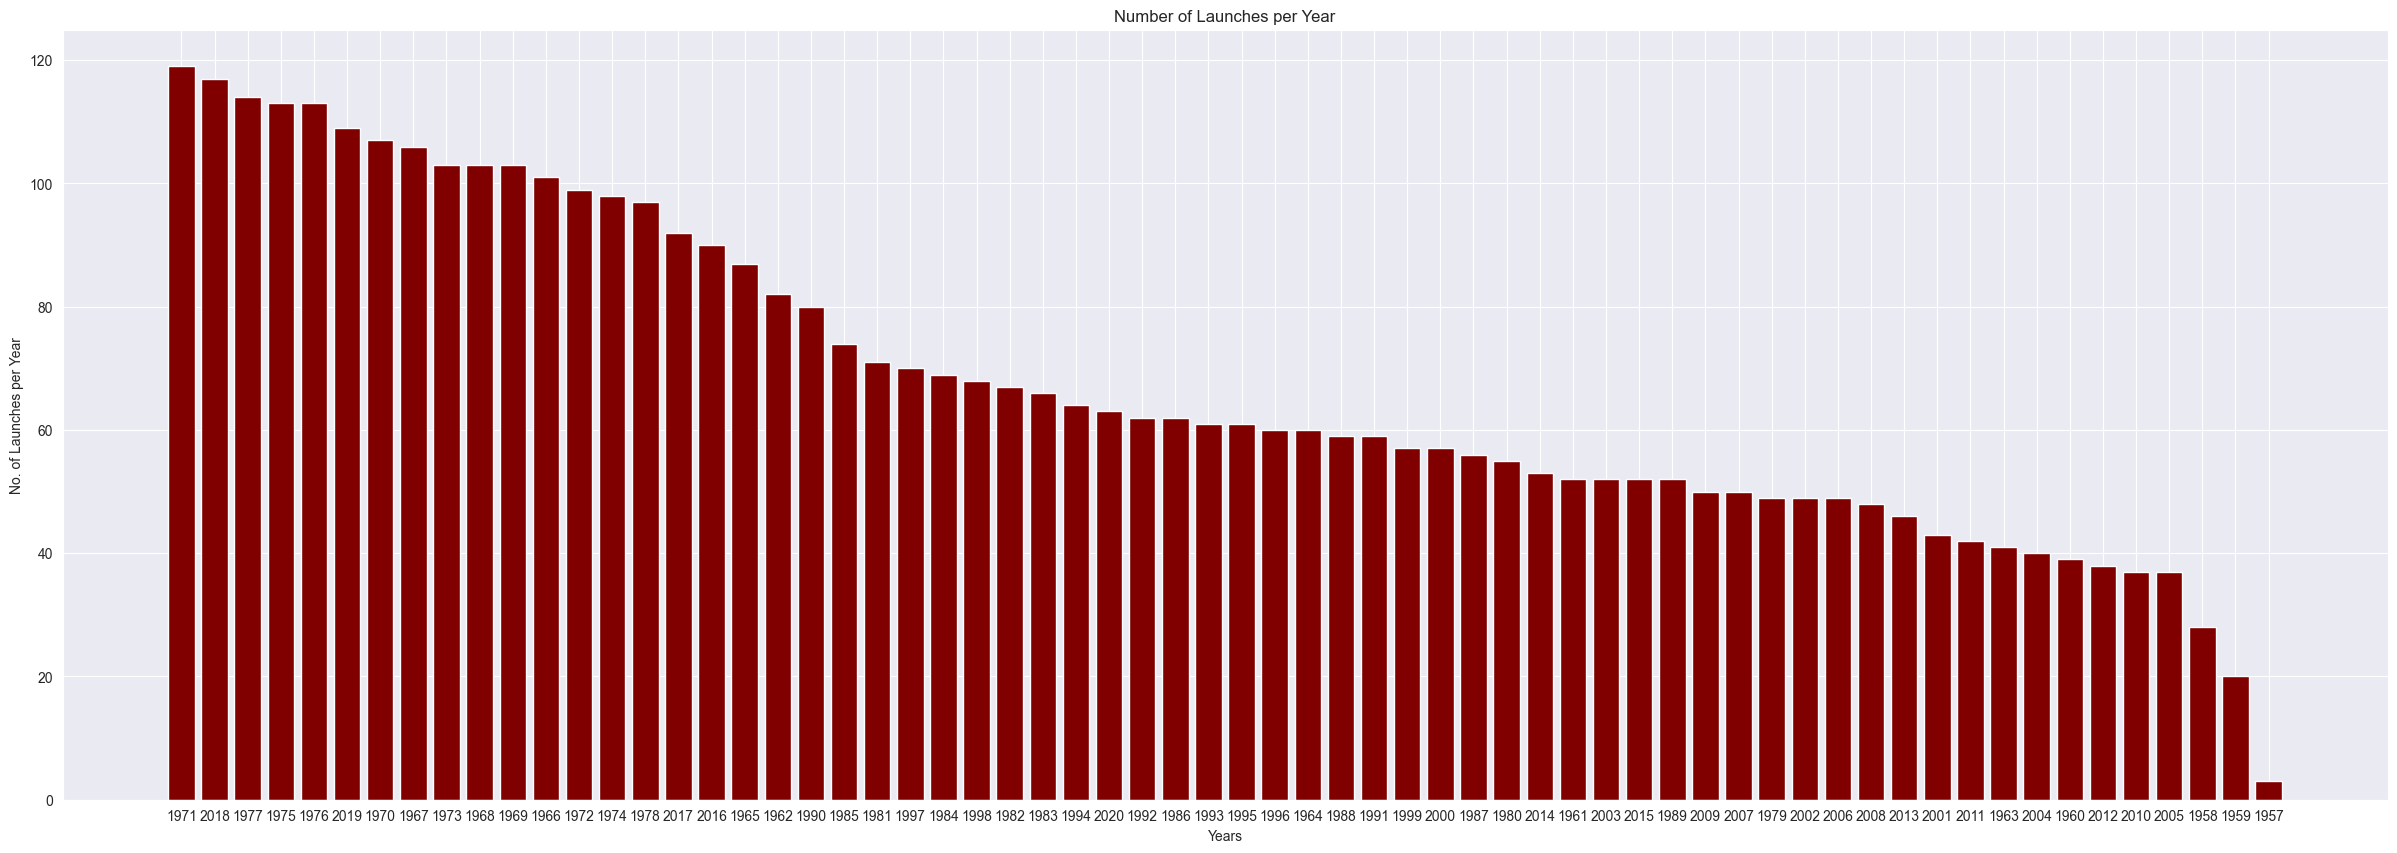

In [171]:
dd = Number_of_Launches_per_Year1.value_counts()
fig = plt.figure(figsize = (30, 10))

# creating the bar plot
plt.bar(dd.index, dd.values, color ='maroon',)

plt.xlabel("Years")
plt.ylabel("No. of Launches per Year")
plt.title("Number of Launches per Year")
plt.show()

# Chart the Number of Launches Month-on-Month until the Present


In [172]:
out_put_data_count = []
out_put_data_month = []
month_list = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for year in range(1957, 2021):
    year_select = df_data[df_data.Date.str.split().str[3] == str(year)].Date.str.split().str[1]
    for month in month_list:
        out_put_data_count.append(len(year_select[year_select == month]))
        out_put_data_month.append(month)

Text(0, 0.5, 'Launches')

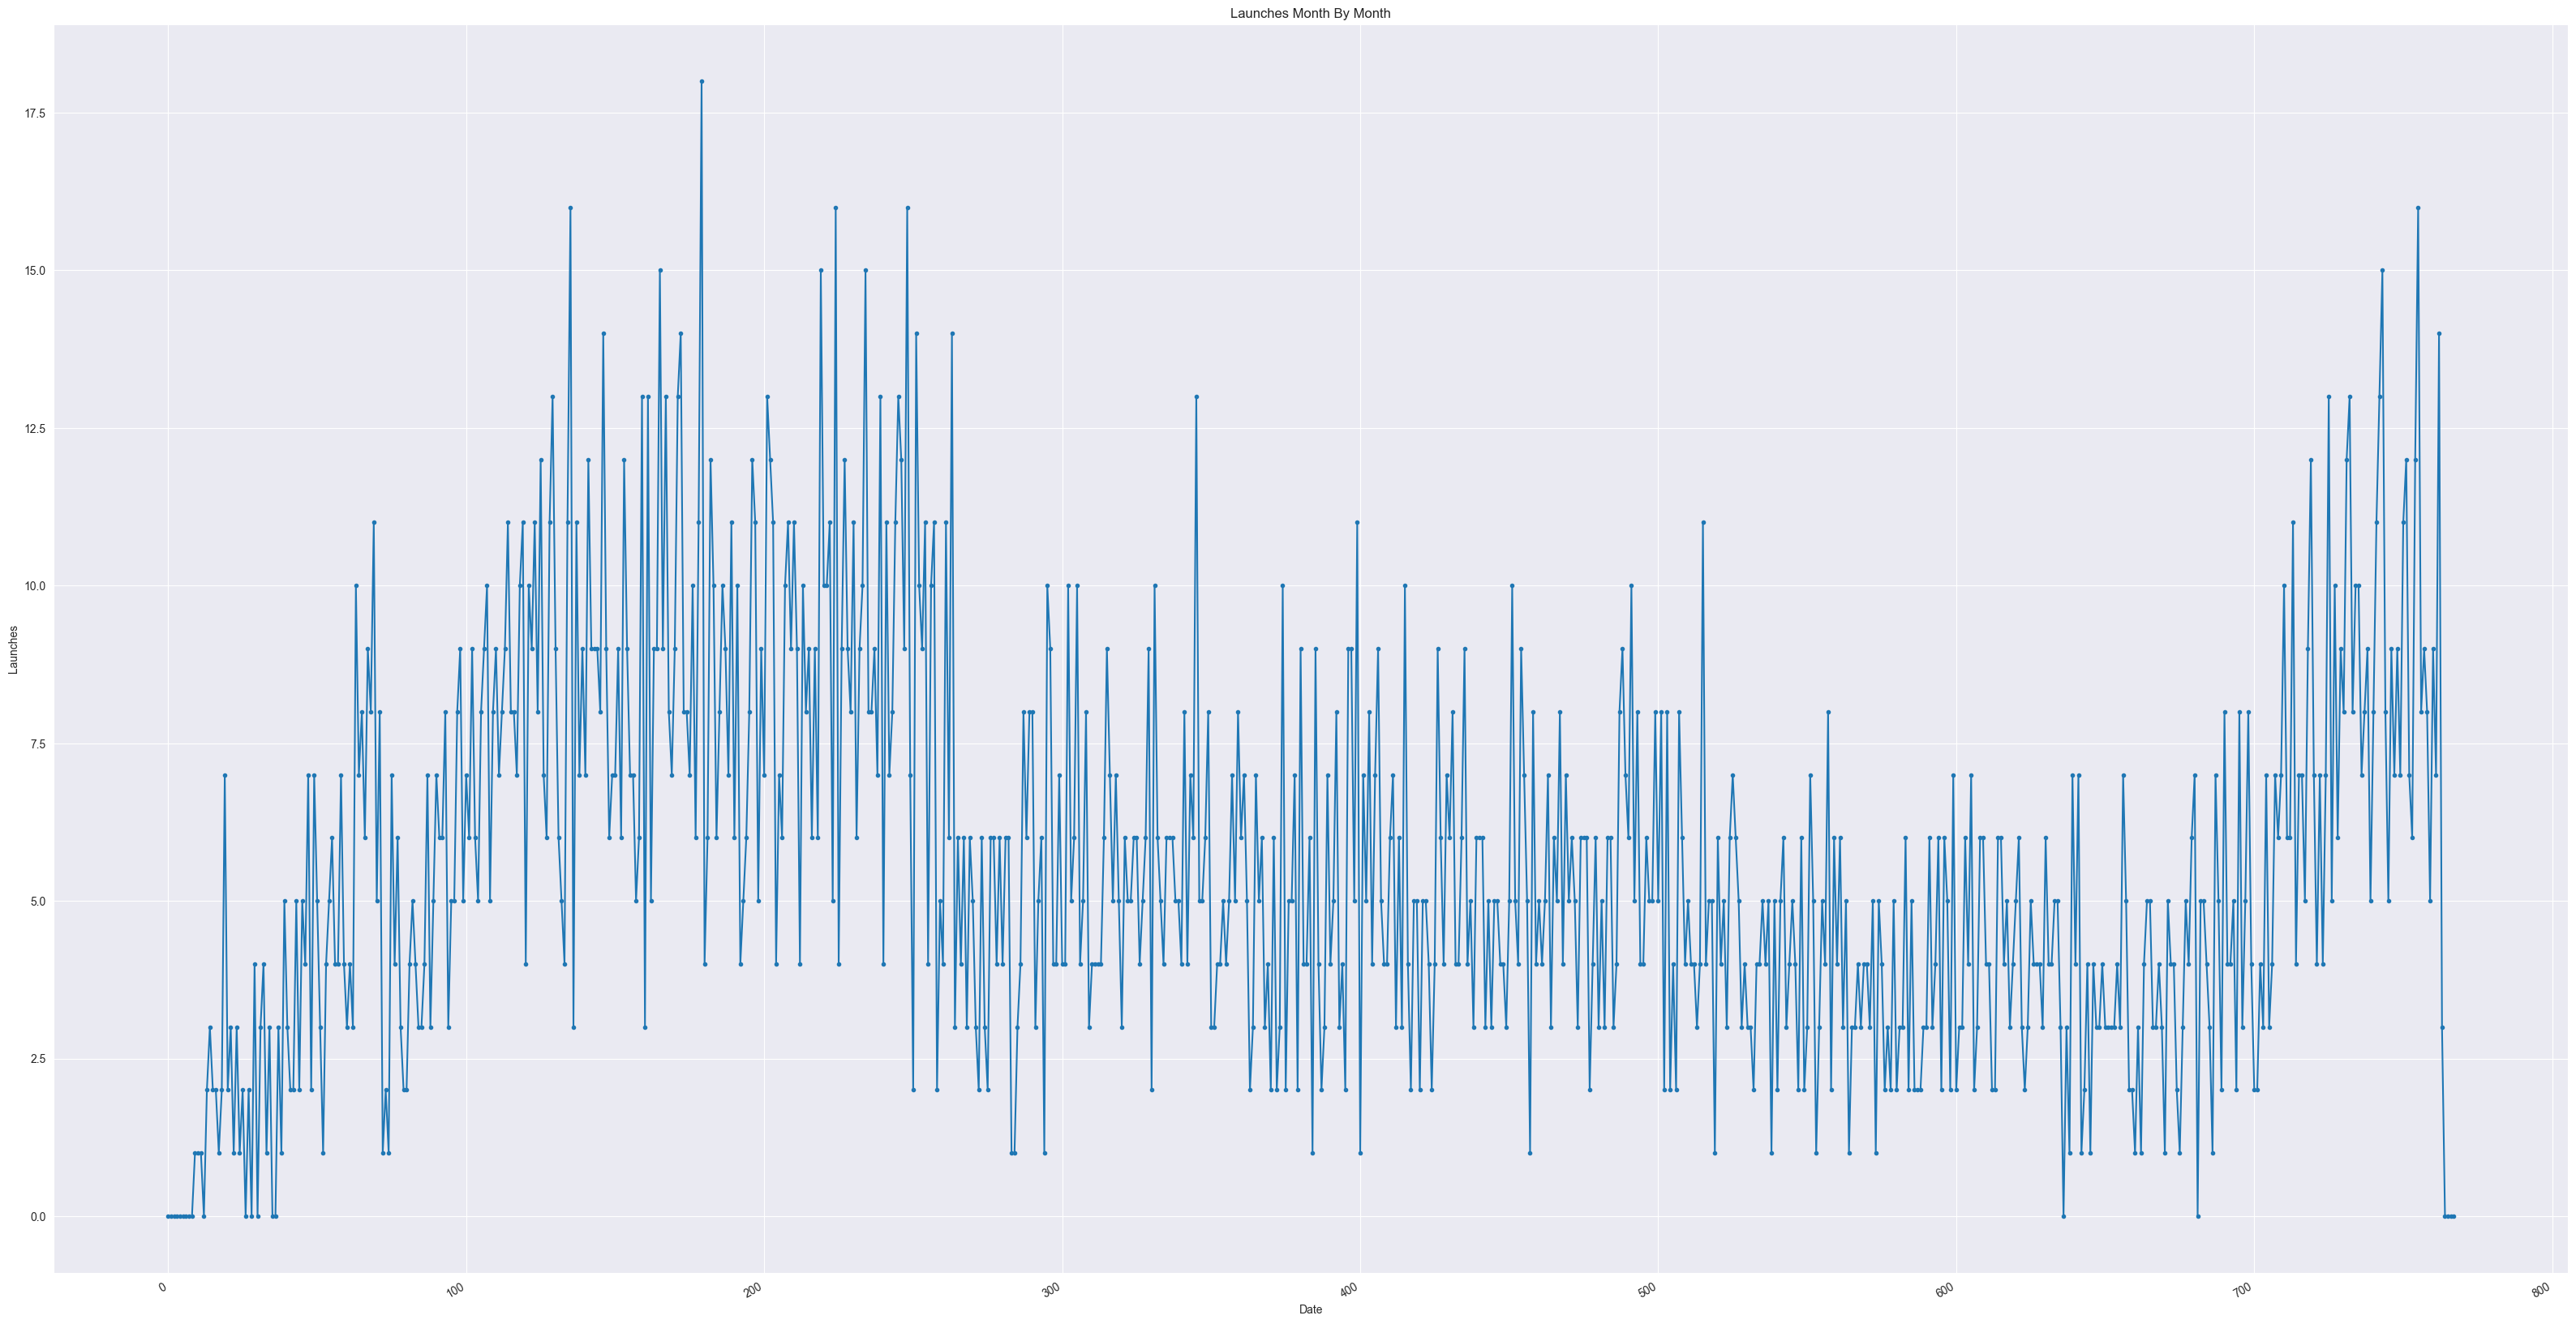

In [173]:
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)
plt.plot(out_put_data_count, '.-')

plt.title('Launches Month By Month')


plt.xticks(rotation=30, ha='right')


plt.xlabel('Date')
plt.ylabel('Launches')

# Launches per Month: Which months are most popular and least popular for launches?


In [174]:
Number_of_Launches_per_Month = df_data.Date.str.split()

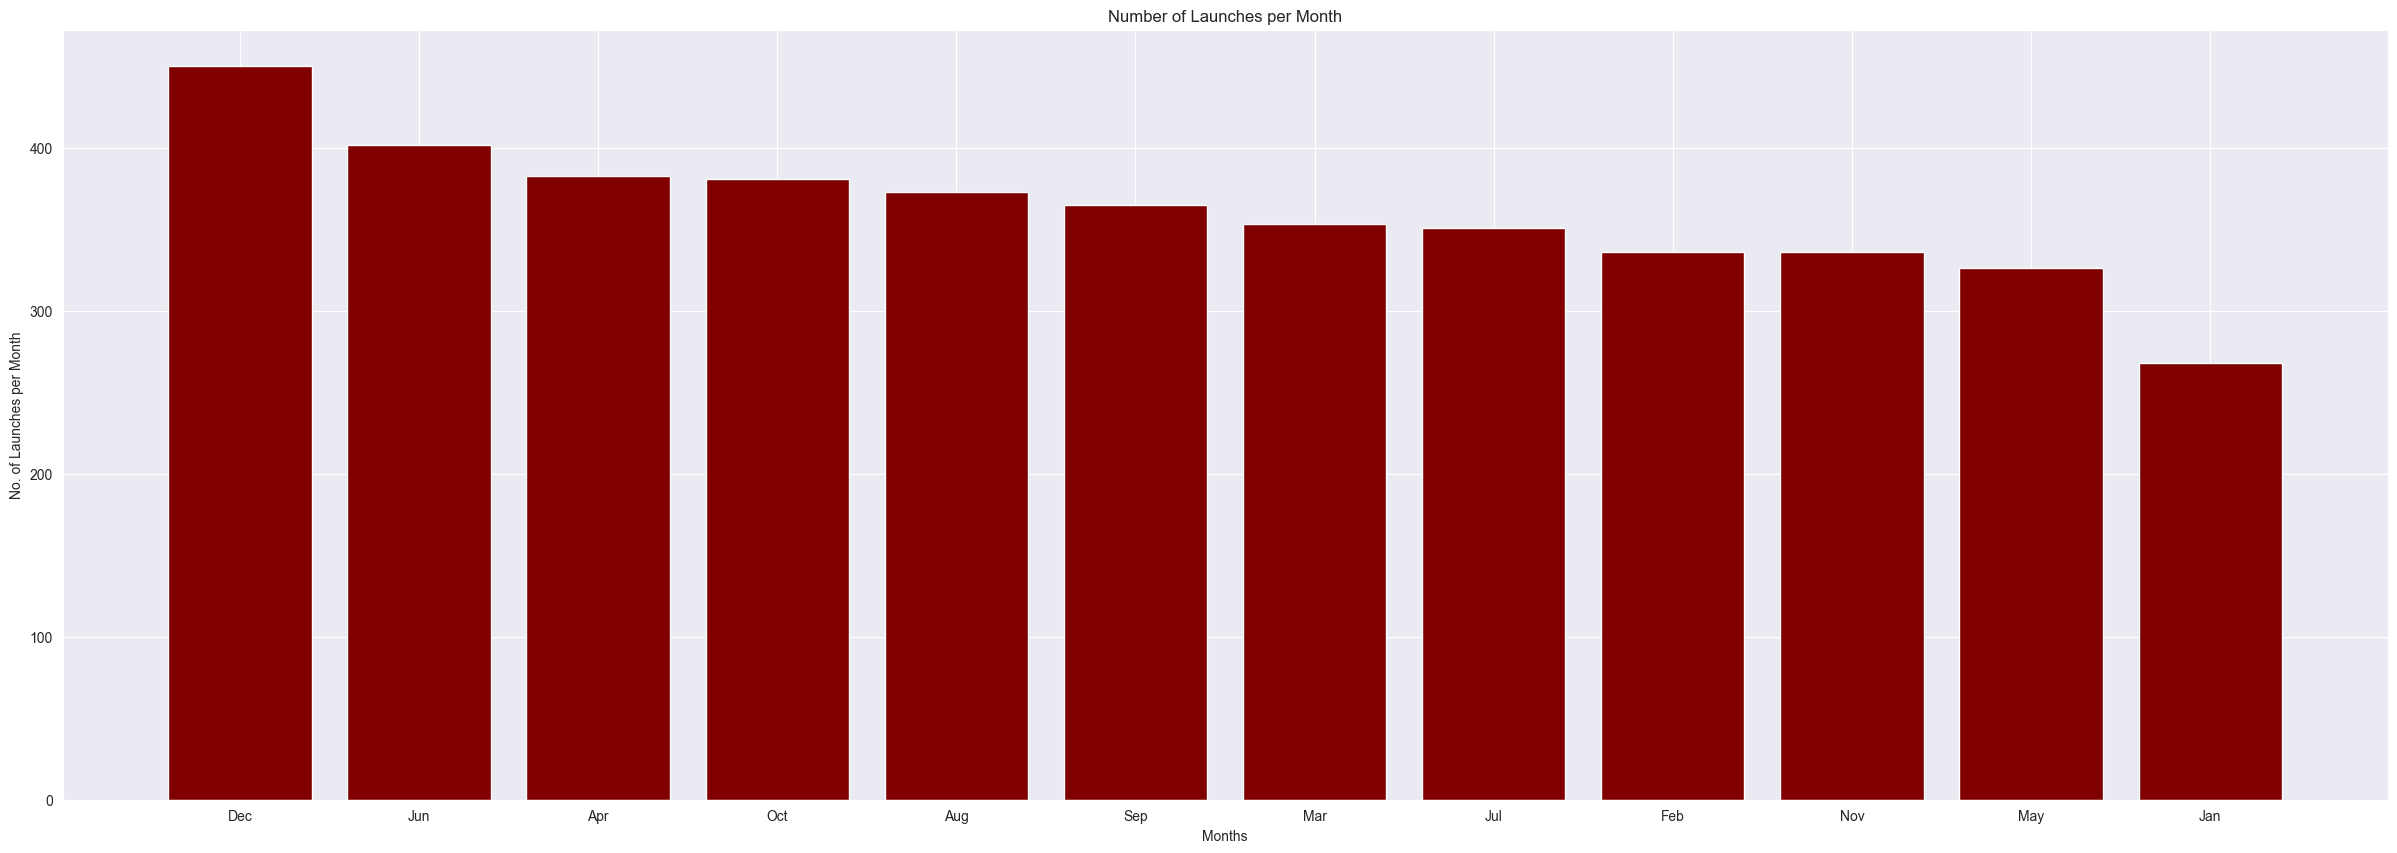

In [175]:
dd8 = Number_of_Launches_per_Month.str[1].value_counts()
fig8 = plt.figure(figsize = (30, 10))

# creating the bar plot
plt.bar(dd8.index, dd8.values, color ='maroon',)

plt.xlabel("Months")
plt.ylabel("No. of Launches per Month")
plt.title("Number of Launches per Month")
plt.show()

# How has the Launch Price varied Over Time? 


In [177]:
year_s = []
year_average = []
for year in range(1957, 2021):
    year_select = df_data[df_data.Date.str.split().str[3] == str(year)].Price
    year_s.append(year)
    year_average.append(round(year_select.sum()/len(year_select)))


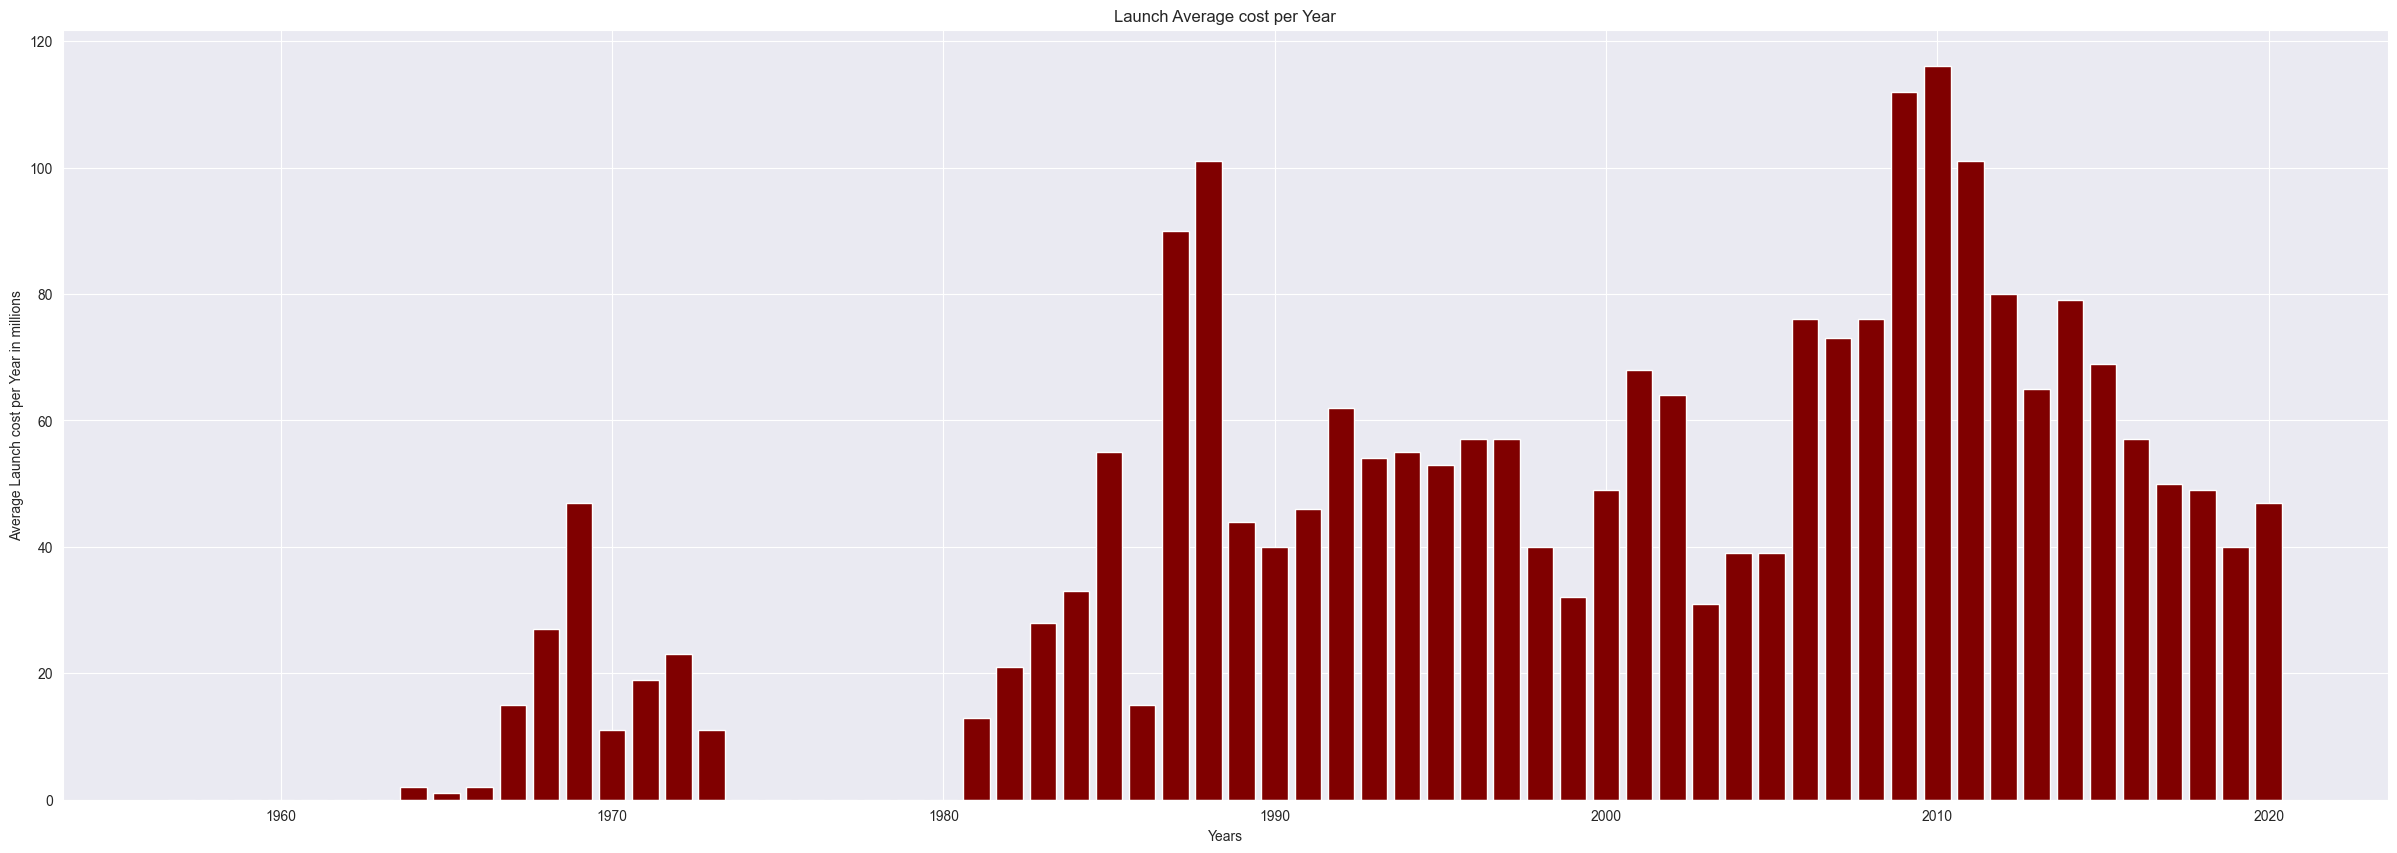

In [215]:
dd = Number_of_Launches_per_Year1.value_counts()
fig = plt.figure(figsize = (30, 10))

# creating the bar plot
plt.bar(year_s, year_average, color ='maroon',)

plt.xlabel("Years")
plt.ylabel("Average Launch cost per Year in millions")
plt.title("Launch Average cost per Year")
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 


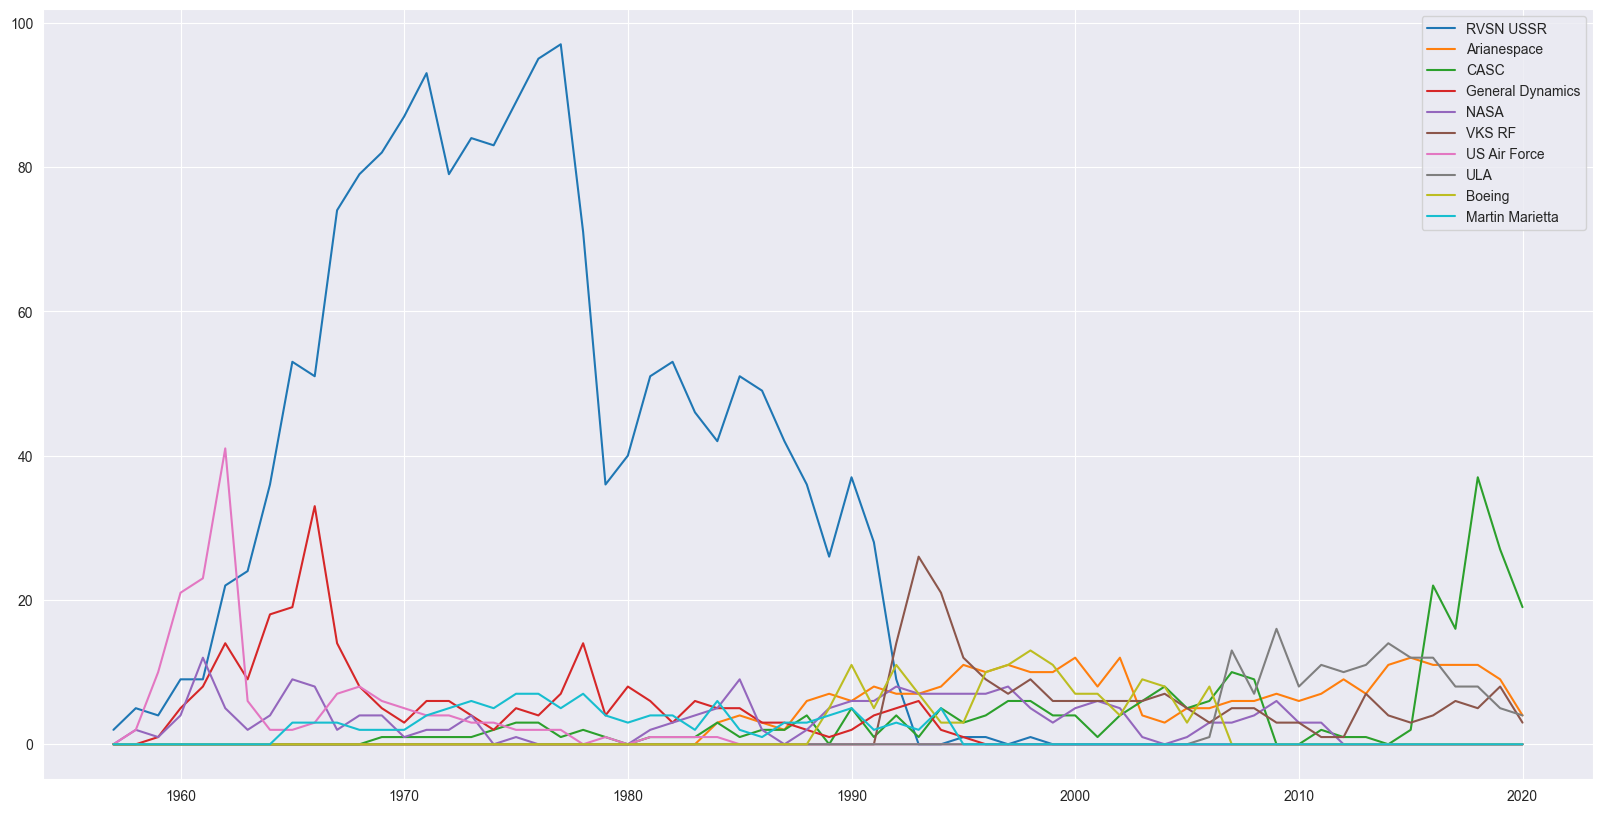

In [193]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
for org in df_data.Organisation.value_counts().head(10).index:
    out = []
    out_year = []
    data = df_data[df_data.Organisation == org]
    for year in range(1957, 2021):
        inner = data[data.Date.str.split().str[3] == str(year)]
        out.append(len(inner))
        out_year.append(year)
    plt.plot(out_year, out, label=org)
plt.legend()
plt.show()



# Cold War Space Race: USA vs USSR

In [10]:
usa = df_data[df_data.iloc[:,1].str.split().str[-1] == "USA"]
usa_spent = usa.loc[(pd.to_numeric(usa['Date'].str.split().str[3]) >= 1957) & (pd.to_numeric(usa['Date'].str.split().str[3]) <= 1991)].Price.sum()
launch_cout = len(usa.loc[(pd.to_numeric(usa['Date'].str.split().str[3]) >= 1957) & (pd.to_numeric(usa['Date'].str.split().str[3]) <= 1991)].Price)
print(f"USA Spent: {round(usa_spent)} Million on {launch_cout} Space Missions from 1957 to 1991")

USA Spent: 36991 Million on 662 Space Missions from 1957 to 1991


In [9]:
ussr = df_data[(df_data.iloc[:,1].str.split().str[-1] == "Russia")]
ussr1 =  df_data[(df_data.iloc[:,1].str.split().str[-1] == "Kazakhstan")]
ussr_spent = ussr.loc[(pd.to_numeric(ussr['Date'].str.split().str[3]) >= 1957) & (pd.to_numeric(ussr['Date'].str.split().str[3]) <= 1991)].Price.sum() + ussr1.loc[(pd.to_numeric(ussr1['Date'].str.split().str[3]) >= 1957) & (pd.to_numeric(ussr1['Date'].str.split().str[3]) <= 1991) & ussr1['Price'] != "NaN"].Price.sum()
launch_coutt = len(ussr.loc[(pd.to_numeric(ussr['Date'].str.split().str[3]) >= 1957) & (pd.to_numeric(ussr['Date'].str.split().str[3]) <= 1991)].Price)
print(f"USSR Spent: {round(ussr_spent)} Million on {launch_coutt} Space Missions from 1957 to 1991")


USSR Spent: 12150 Million on 1188 Space Missions from 1957 to 1991


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA


In [339]:
data_x = [1188, 662]
names_x = ['USSR', 'USA']

fig = px.pie(values=data_x, names=names_x)
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

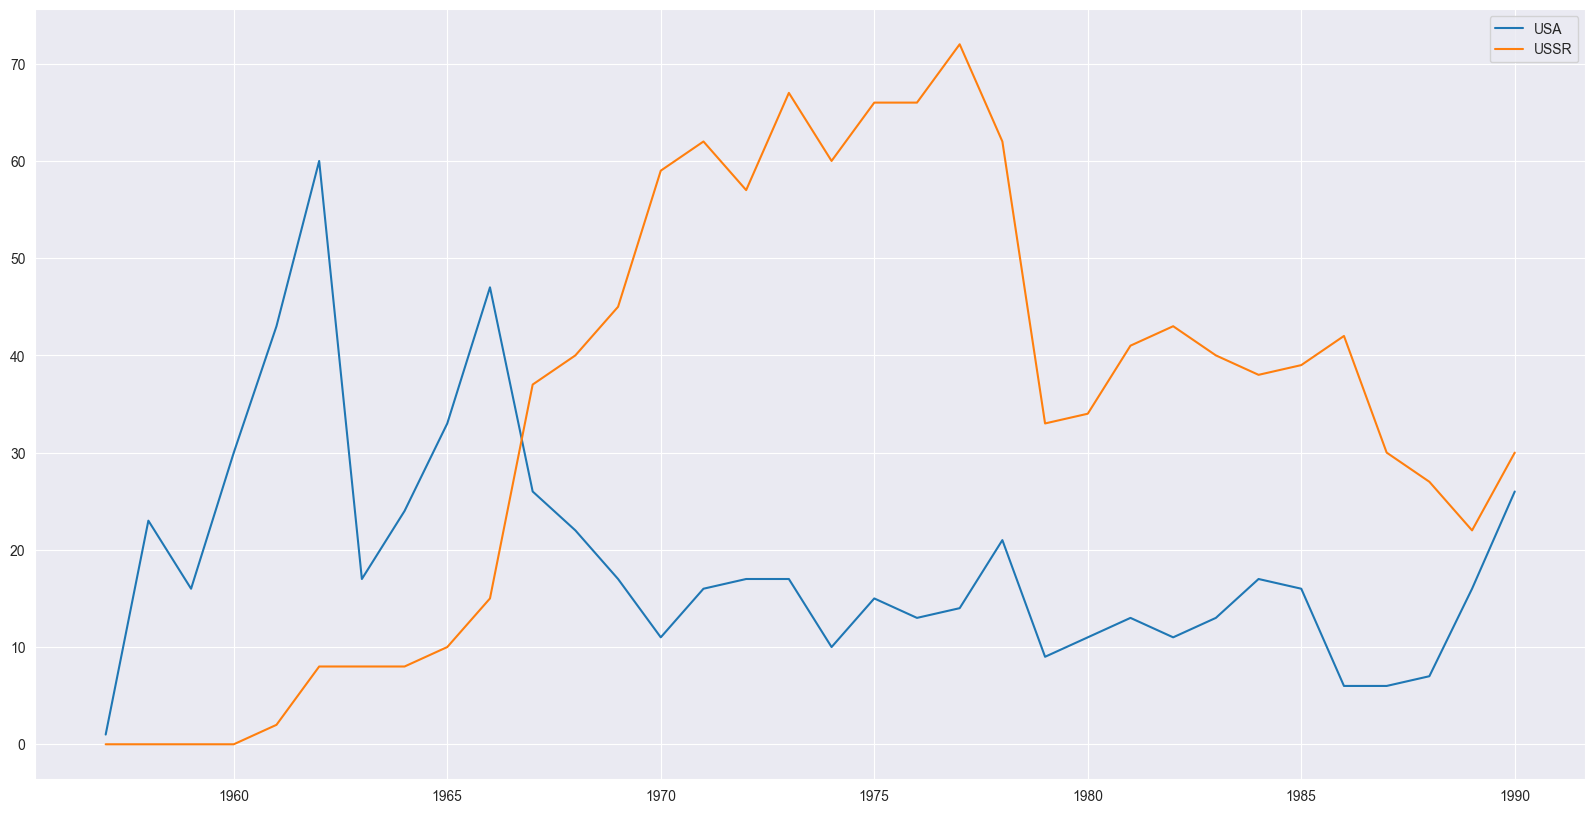

In [349]:
year_b_year_usa = []
year_b_year_ussr = []
year_oo = []
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
for year in range (1957, 1991):
   year_oo.append(year)
   year_b_year_usa.append(len(usa[usa['Date'].str.split().str[3] == str(year)]))
   year_b_year_ussr.append(len(ussr[ussr['Date'].str.split().str[3] == str(year)]))
plt.plot(year_oo, year_b_year_usa, label="USA")
plt.plot(year_oo, year_b_year_ussr, label="USSR")
plt.legend()
plt.show()


## Chart the Total Number of Mission Failures Year on Year.

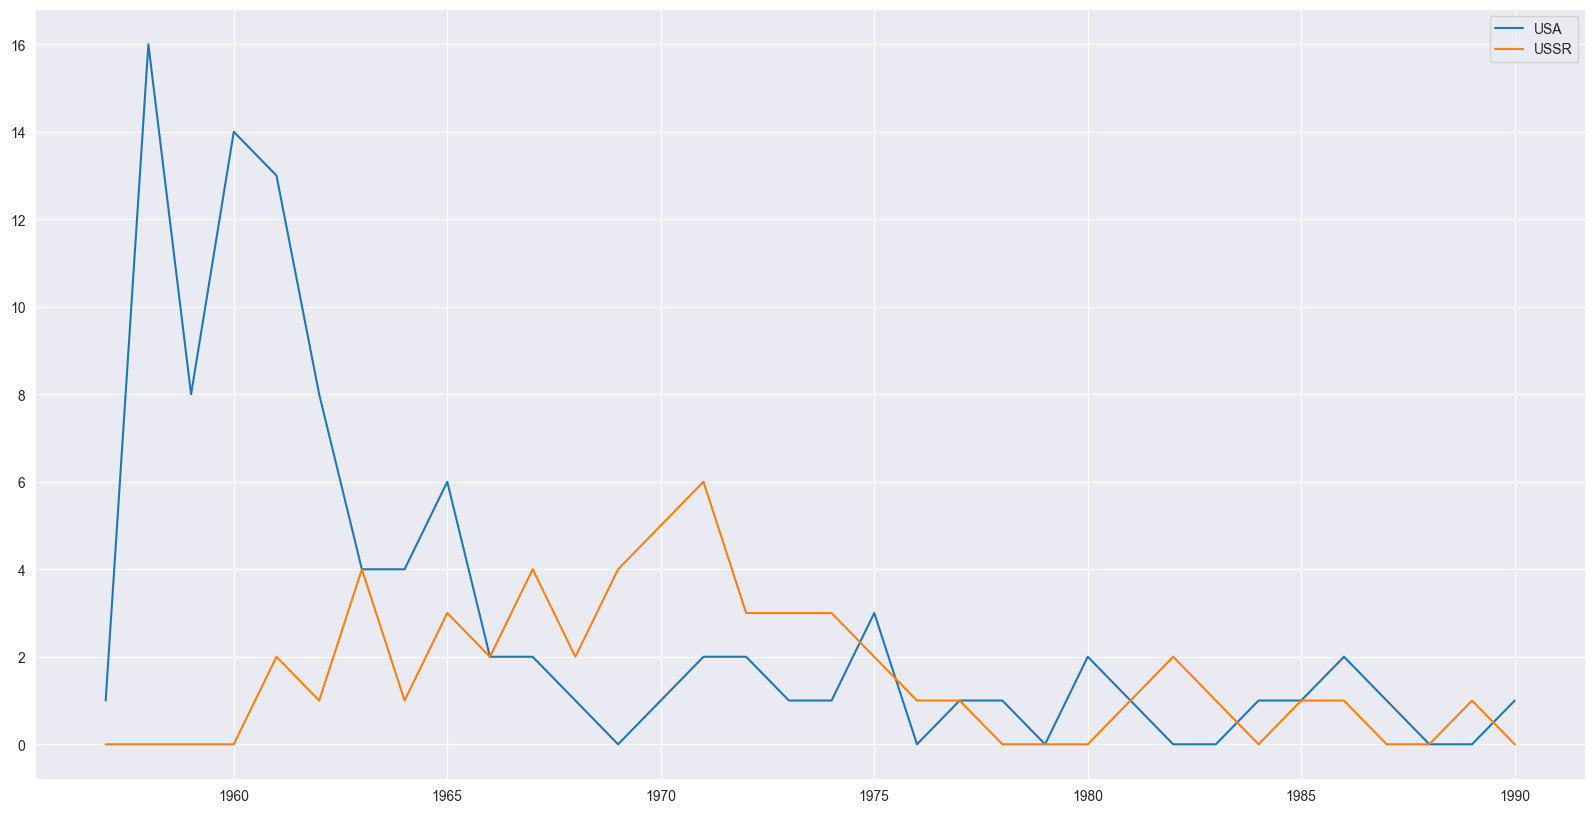

In [359]:
year_a_year_usa = []
year_a_year_ussr = []
year_oo = []
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
for year in range (1957, 1991):
    year_oo.append(year)
    us_data = (usa[usa['Date'].str.split().str[3] == str(year)])
    ussr_data = (ussr[ussr['Date'].str.split().str[3] == str(year)])
    year_a_year_usa.append( len( us_data[us_data['Mission_Status'] == 'Failure']) )
    year_a_year_ussr.append(len( ussr_data[ussr_data['Mission_Status'] == 'Failure']))
plt.plot(year_oo, year_a_year_usa, label="USA")
plt.plot(year_oo, year_a_year_ussr, label="USSR")
plt.legend()
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

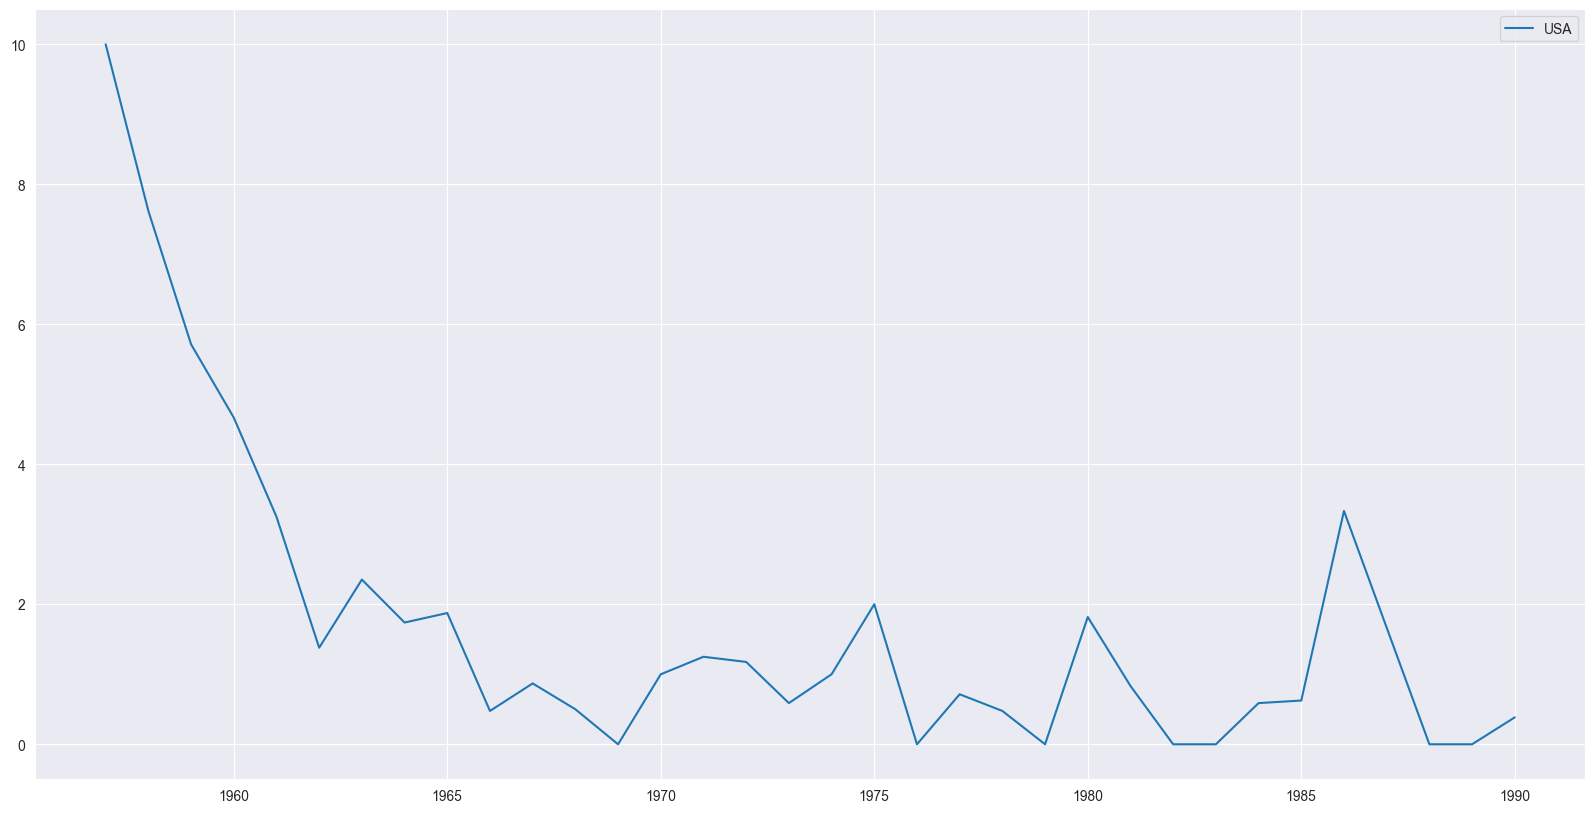

In [363]:
year_a_year_usa = []
year_a_year_ussr = []
year_oo = []
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
for year in range (1957, 1991):
    year_oo.append(year)
    us_data = (usa[usa['Date'].str.split().str[3] == str(year)])
    dfd = (len(us_data[us_data['Mission_Status'] == 'Failure'])/(len(us_data[us_data['Mission_Status'] == 'Failure'])+len(us_data[us_data['Mission_Status'] == 'Success'])))*10
    year_a_year_usa.append(dfd)
plt.plot(year_oo, year_a_year_usa, label="USA")
plt.legend()
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including (2020)

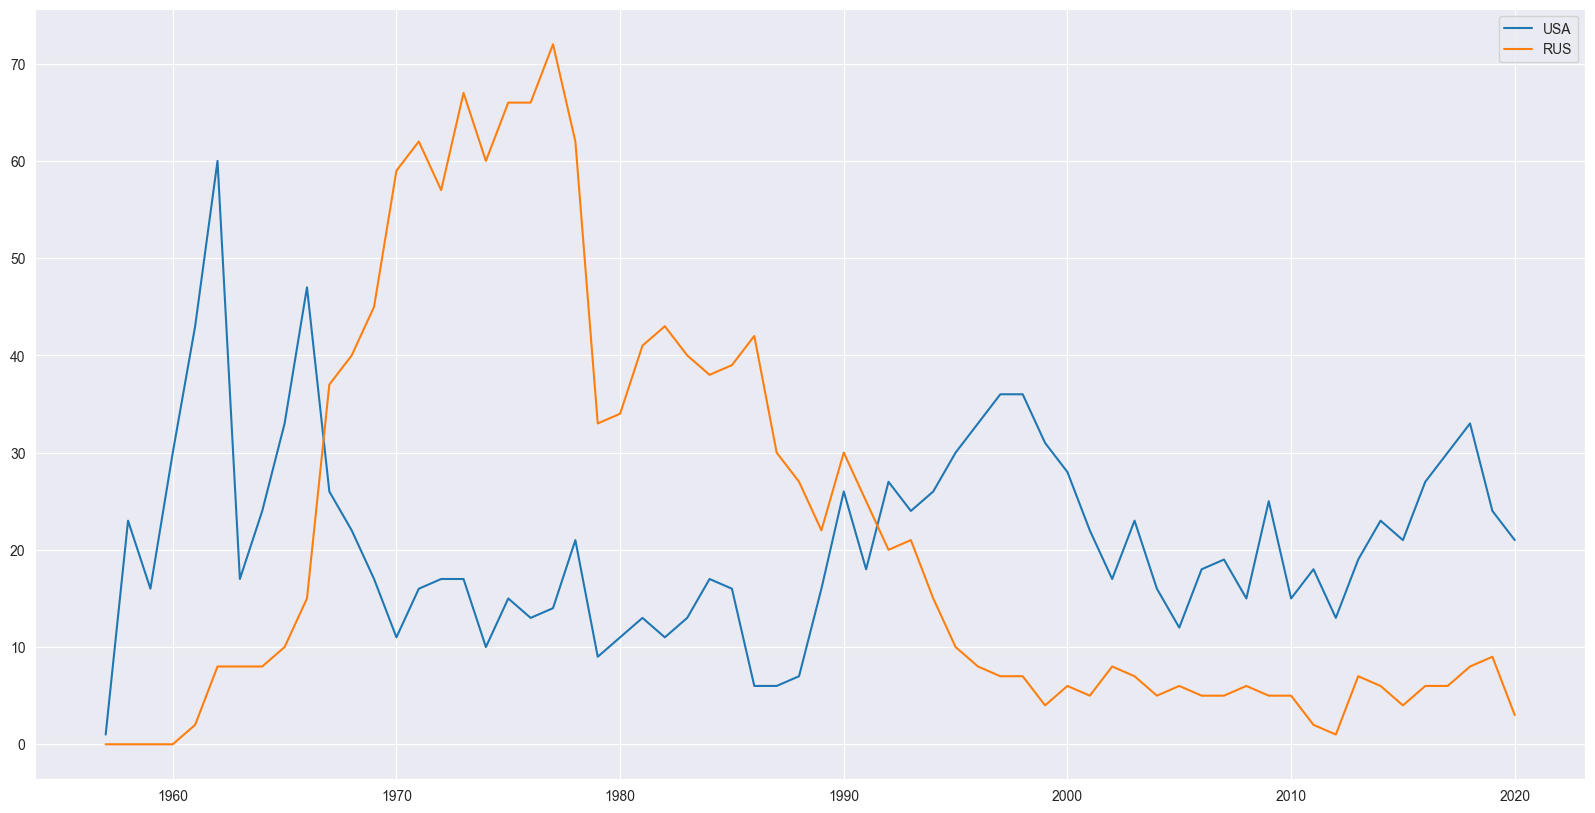

In [12]:
year_a_year_usa = []
year_a_year_ussr = []
year_oo = []
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
for year in range (1957, 2021):
    year_oo.append(year)
    us_data = (usa[usa['Date'].str.split().str[3] == str(year)])
    ussr_data = (ussr[ussr['Date'].str.split().str[3] == str(year)])
    year_a_year_usa.append(len(us_data))
    year_a_year_ussr.append(len( ussr_data))
plt.plot(year_oo, year_a_year_usa, label="USA")
plt.plot(year_oo, year_a_year_ussr, label="RUS")
plt.legend()
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

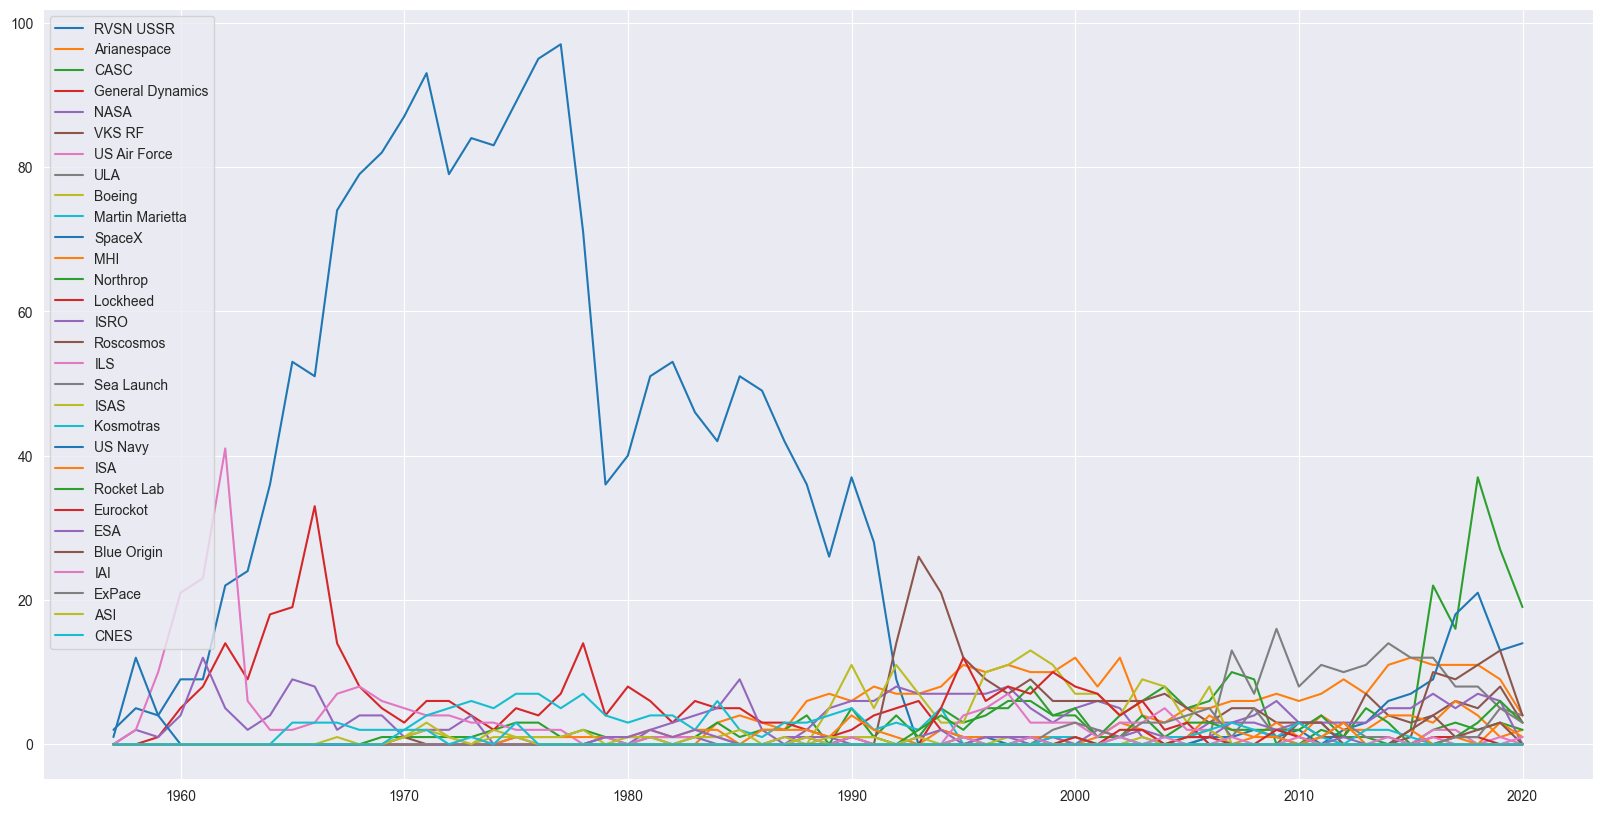

In [15]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
for org in df_data.Organisation.value_counts().head(30).index:
    out = []
    out_year = []
    data = df_data[df_data.Organisation == org]
    for year in range(1957, 2021):
        inner = data[data.Date.str.split().str[3] == str(year)]
        out.append(len(inner))
        out_year.append(year)
    plt.plot(out_year, out, label=org)
plt.legend()
plt.show()